In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

comments = pd.read_csv('/content/drive/MyDrive/Projects Py, SQL, PBI/Mine P5 Youtube Analysis - Python/UScomments.csv', on_bad_lines='skip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-8f15527cf058>:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('/content/drive/MyDrive/Projects Py, SQL, PBI/Mine P5 Youtube Analysis - Python/UScomments.csv', on_bad_lines='skip')


In [ ]:
comments.head()

In [ ]:
## lets find out missing values in your data
comments.isnull().sum()

In [ ]:
## drop missing values as we have very few & lets update dataframe as well..
comments.dropna(inplace=True)

In [ ]:
comments.isnull().sum()

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

### its a neutral sentence !

In [ ]:
comments.shape

In [ ]:
## for those of you who dont have good specifications , considering sample of data is a good option !

sample_df = comments[0:1000]

In [ ]:
sample_df.shape

In [ ]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [ ]:
len(polarity)

In [ ]:
comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

## 3..  Wordcloud Analysis of your data


In [ ]:
### Lets perform EDA for the highly Positve sentences ie Polarity value will be 1

filter1 = comments['polarity']==1
comments_positive = comments[filter1]
filter2 = comments['polarity']==-1
comments_negative = comments[filter2]

In [ ]:
comments_positive.head(5)

In [ ]:
comments_negative.head(5)

(-0.5, 399.5, 199.5, -0.5)

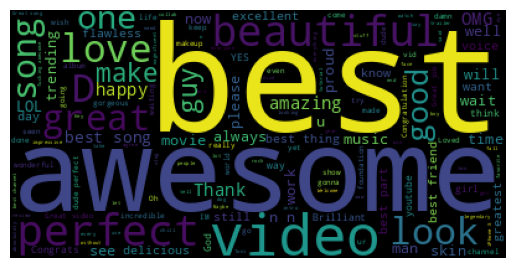

In [ ]:
from wordcloud import WordCloud , STOPWORDS
set(STOPWORDS)
comments['comment_text']
type(comments['comment_text'])
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.imshow(wordcloud)
plt.axis('off')
### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

(-0.5, 399.5, 199.5, -0.5)

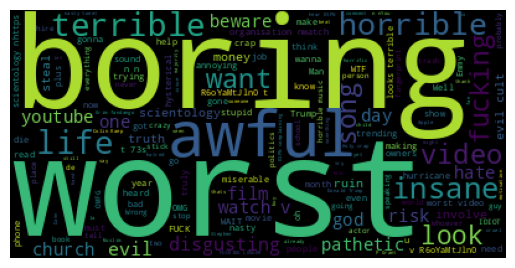

In [ ]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)
plt.imshow(wordcloud2)
plt.axis('off')

In [ ]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

## 4.. Perform Emoji's Analysis

In [ ]:
!pip install emoji==2.2.0 ## 2.2.0 is a most stable version till date , hence installing this version makes sense !
import emoji

In [ ]:
emoji.__version__

'2.2.0'

In [ ]:
comments['comment_text'].head(6)

In [ ]:
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [ ]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [ ]:
### NOw we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [ ]:
from collections import Counter
Counter(all_emojis_list).most_common(10)

[('😂', 7534),
 ('❤', 6396),
 ('😍', 5674),
 ('😬', 3137),
 ('😭', 1789),
 ('🔥', 1348),
 ('💕', 1332),
 ('👏', 1314),
 ('👍', 1087),
 ('😘', 1050)]

In [ ]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [ ]:
freqs

[7534, 6396, 5674, 3137, 1789, 1348, 1332, 1314, 1087, 1050]

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace = go.Bar(x=emojis , y=freqs)

In [ ]:
iplot([trace])

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..